In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка датасета

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


Преобразование загруженного файла в DataFrame

In [ ]:
file_name = list(uploaded.keys())[0]  # Получение имени загруженного файла
df = pd.read_csv(file_name)

<ipython-input-156-f67fd3e45cd2>:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650

Вывод первых 10 строк в виде таблицы

In [ ]:
from IPython.display import display
print("Первые 10 строк датасета:")
display(df.head(10))

Первые 10 строк датасета:


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


Вывод размеров датасета

In [ ]:
print(f"Размер исходного датасета: {df.shape}")

Размер исходного датасета: (14456, 2666)


Удаление дубликатов строк

In [ ]:
print("Удаление дубликатов...")
df = df.drop_duplicates()
print(f"Размер после удаления дубликатов: {df.shape}")

Удаление дубликатов...
Размер после удаления дубликатов: (14456, 2666)


Удаление дублирующихся колонок (по содержимому)

In [ ]:
df = df.loc[:, ~df.columns.duplicated()].copy()
print(f"Размер после удаления дублирующихся колонок: {df.shape}")

Размер после удаления дублирующихся колонок: (14456, 2666)


Информация о данных

In [ ]:
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


Фиксация начального количества колонок

In [ ]:
initial_columns = df.shape[1]

удаление колонок с одинаковыми значениями

In [ ]:
print("Удаление колонок с одинаковыми значениями...")
def del_duplicate_columns(dataframe):
    unique_columns = []
    for column in dataframe.columns:
        if not any(dataframe[column].equals(dataframe[col]) for col in unique_columns):
            unique_columns.append(column)
    return dataframe[unique_columns]

df = del_duplicate_columns(df)
print(f"Размер после удаления колонок с одинаковыми значениями: {df.shape}")

Удаление колонок с одинаковыми значениями...
Размер после удаления колонок с одинаковыми значениями: (14456, 2213)


Визуализация пропусков

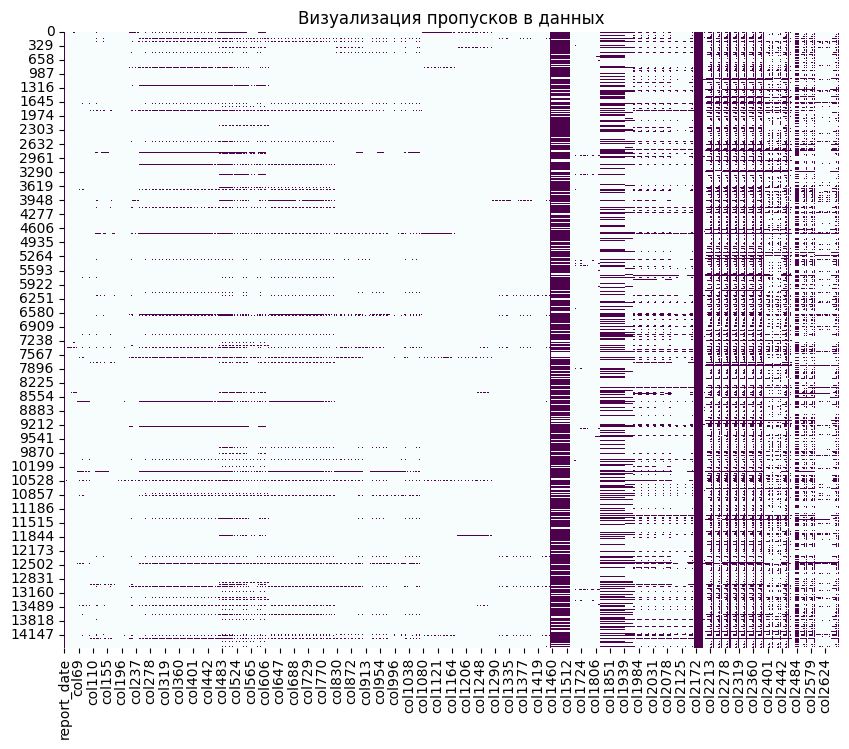

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='BuPu_r', cbar=False)
plt.title("Визуализация пропусков в данных")
plt.show()

Удаление колонок, где все значения NaN

In [ ]:
df = df.dropna(how='all', axis=1)
print(f"Размер после удаления колонок с полными пропусками: {df.shape}")

Размер после удаления колонок с полными пропусками: (14456, 2212)


минус 1 колонка

Проверка количества пропусков в ключевых колонках

In [ ]:
columns_to_check = ['target', 'report_date', 'client_id']
print("Количество пропусков в ключевых колонках:")
for column in columns_to_check:
    if column in df.columns:
        print(f"{column}: {df[column].isnull().sum()}")
    else:
        print(f"{column}: Колонка отсутствует в датасете")

Количество пропусков в ключевых колонках:
target: 0
report_date: 0
client_id: 0


Поиск колонок без пропусков

In [ ]:
columns_without_na = df.columns[df.notna().all()]
print(f"Колонки без пропусков: {list(columns_without_na)}")

Колонки без пропусков: ['report_date', 'client_id', 'target', 'col1453', 'col2663']


Анализ колонок без пропусков (например, 'col1453', 'col2663')

In [ ]:
if 'col1453' in df.columns:
    print("Анализ колонки 'col1453':")
    print(df['col1453'].info())
    print(f"Уникальные значения: {df['col1453'].unique()}")
    print("[0, 1] -> булевое значение")

Анализ колонки 'col1453':
<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col1453
Non-Null Count  Dtype
--------------  -----
14456 non-null  int64
dtypes: int64(1)
memory usage: 113.1 KB
None
Уникальные значения: [0 1]
[0, 1] -> булевое значение


In [ ]:
if 'col2663' in df.columns:
    print("Анализ колонки 'col2663':")
    print(df['col2663'].info())
    print(f"Уникальные значения: {df['col2663'].unique()}")

    # Создание таблицы с вероятностью покупки машиноместа
    col2663_table = pd.DataFrame({
        'Значение': df['col2663'].unique(),
        'Частота': df['col2663'].value_counts().values})
    display(col2663_table)
    display(df['col2663'].describe())
    print("это вероятность покупки машиноместа")
    df = df.rename(columns={'col2663': 'probability'})

Удаление колонок с пропусками более 70%

In [ ]:
threshold = len(df) * 0.7
df = df.loc[:, df.isna().sum() <= threshold]
print(f"Размер после удаления колонок с пропусками > 70%: {df.shape}")

Размер после удаления колонок с пропусками > 70%: (14456, 276)


Визуализация оставшихся пропусков

In [ ]:
display(df.head(10))

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,probability
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,362.0,362.0,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,0,0b498e8a-7c01-466d-b112-0c5785574f45,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


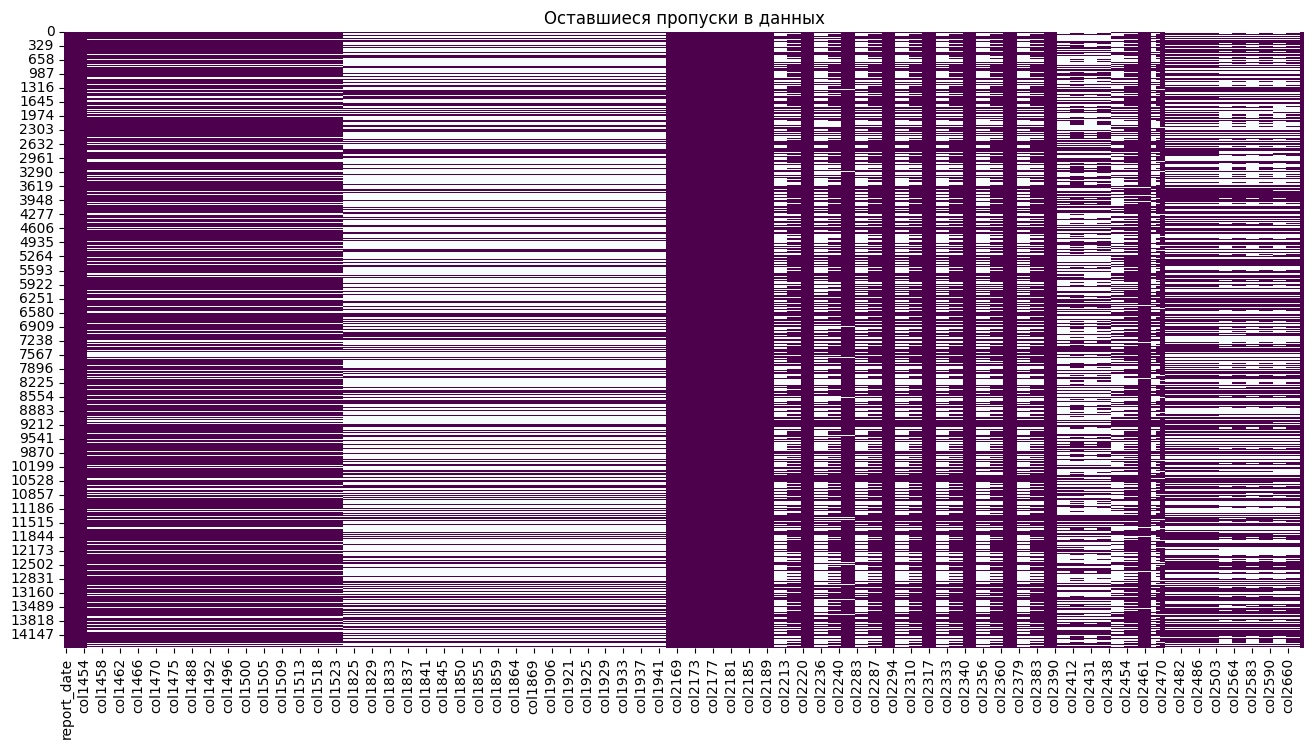

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cmap='BuPu_r', cbar=False)
plt.title("Оставшиеся пропуски в данных")
plt.show()

Дополнительно: количество пропусков в каждой колонке

In [ ]:
missing_values = df.isnull().sum()
print("Количество пропусков в каждой колонке:")
print(missing_values[missing_values > 0])

Количество пропусков в каждой колонке:
col1454       1
col1455    3337
col1456    3337
col1457    3337
col1458    3337
           ... 
col2655    8249
col2656    8249
col2660    6420
col2661    6420
col2662    6420
Length: 271, dtype: int64


Анализ колонок типа object

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print(f"Колонки типа object: {list(object_columns)}")

Колонки типа object: ['report_date', 'col1454']


Обработка колонки 'report_date' и 'col1454'

In [ ]:
if 'col1454' in df.columns:
    print("Анализ колонки 'col1454':")
    print(f"Количество уникальных значений: {df['col1454'].nunique()}")
    print(f"Количество пропусков: {df['col1454'].isnull().sum()}")
    df = df.drop(['col1454'], axis=1)
    print("Колонка 'col1454' удалена, так как содержит захэшированные данные")

Анализ колонки 'col1454':
Количество уникальных значений: 4817
Количество пропусков: 1
Колонка 'col1454' удалена, так как содержит захэшированные данные


In [ ]:
df['col1454']

,col1454
0,00f3d719-a6ec-4960-ba01-8372eb705443
1,01febac0-b083-494e-8589-f98400074b94
2,0278175e-c0bb-4e1e-bfe5-20db6811d3e2
3,0364571d-5325-ed11-b823-005056b825cd
4,065957a6-9b2a-435a-b561-024e9e8d9ad7
...,...
14451,fc4b5aa0-c4d6-4394-93db-57a1505e66c4
14452,fcc827d8-b64b-4b59-b718-87f2a51d77a4
14453,fd5f22f5-36f6-4dca-9896-8c9e90bbb702
14454,fdf04fb7-5404-4a9c-ae5b-e1e893060631


Кол-во уникальных значений и кол-во пропусков

In [ ]:
#df['col1454'].nunique()
#df['col1454'].isnull().sum()
print(f'''Количество уникальных значений: {df['col1454'].nunique()}
Количество пропусков: {df['col1454'].isnull().sum()}''')

Количество уникальных значений: 4817
Количество пропусков: 1


Удаление дублирующихся строк и колонок

In [ ]:
print("Удаление дублирующихся строк и колонок...")
df = df.T.drop_duplicates().T
print(f"Размер после удаления дубликатов: {df.shape}")

Удаление дублирующихся строк и колонок...
Размер после удаления дубликатов: (14456, 275)


Вывод информации о количестве удалённых колонок

In [ ]:
removed_columns = initial_columns - df.shape[1]
print(f"Было удалено {removed_columns} колонок.")

Было удалено 2391 колонок.


Вывод финального размера датасета

In [ ]:
print(f"Финальный размер датасета: {df.shape}")

Финальный размер датасета: (14456, 275)
